<a href="https://colab.research.google.com/github/ilikecookies112345/DSRP-Project-Mentor-Assignment---Astronomy/blob/main/DSRP_Project_%26_Mentor_Assignment_Astronomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo


from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt


# fetch dataset
solar_flare = fetch_ucirepo(id=89)

# data (as pandas dataframes)
X = solar_flare.data.features
y = solar_flare.data.targets

# metadata
print(solar_flare.metadata)

# variable information
print(solar_flare.variables)

solar_flare_df = pd.concat([X, y], axis=1)
print(solar_flare_df.shape)


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

In [ ]:
solar_flare_df.shape
solar_flare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   modified Zurich class            1389 non-null   object
 1   largest spot size                1389 non-null   object
 2   spot distribution                1389 non-null   object
 3   activity                         1389 non-null   int64 
 4   evolution                        1389 non-null   int64 
 5   previous 24 hour flare activity  1389 non-null   int64 
 6   historically-complex             1389 non-null   int64 
 7   became complex on this pass      1389 non-null   int64 
 8   area                             1389 non-null   int64 
 9   area of largest spot             1389 non-null   int64 
 10  common flares                    1389 non-null   int64 
 11  moderate flares                  1389 non-null   int64 
 12  severe flares                    1

In [ ]:
solar_flare_df.describe()

,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.150468,2.421166,1.089993,1.395968,1.892009,1.025918,1.175666,0.261339,0.067675,0.009359
std,0.357658,0.617129,0.403292,0.489234,0.310481,0.158948,0.380673,0.760201,0.353695,0.103534
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   modified Zurich class            1389 non-null   object
 1   largest spot size                1389 non-null   object
 2   spot distribution                1389 non-null   object
 3   activity                         1389 non-null   int64 
 4   evolution                        1389 non-null   int64 
 5   previous 24 hour flare activity  1389 non-null   int64 
 6   historically-complex             1389 non-null   int64 
 7   became complex on this pass      1389 non-null   int64 
 8   area                             1389 non-null   int64 
 9   area of largest spot             1389 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 108.6+ KB
None


In [ ]:
solar_flare_df.head(10)

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
5,D,A,O,1,2,1,1,2,1,2,0,0,0
6,D,A,O,1,2,1,1,2,1,1,0,0,0
7,D,A,O,1,2,1,1,2,1,2,0,0,0
8,D,K,O,1,3,1,1,2,1,2,0,0,0
9,C,R,O,1,3,1,1,2,1,1,0,0,0


In [ ]:
print(solar_flare_df.isna().sum())

solar_flare_df.columns

modified Zurich class              0
largest spot size                  0
spot distribution                  0
activity                           0
evolution                          0
previous 24 hour flare activity    0
historically-complex               0
became complex on this pass        0
area                               0
area of largest spot               0
common flares                      0
moderate flares                    0
severe flares                      0
dtype: int64


Index(['modified Zurich class', 'largest spot size', 'spot distribution',
       'activity', 'evolution', 'previous 24 hour flare activity',
       'historically-complex', 'became complex on this pass', 'area',
       'area of largest spot', 'common flares', 'moderate flares',
       'severe flares'],
      dtype='object')

In [ ]:
solar_flare_df.rename(columns = {'historically-complex' : 'Historically Complex' ,'modified Zurich class' : 'Modified Zurich Class', 'largest spot size' : 'Largest Spot Size' , 'spot distribution' :'Spot Distribution',
       'activity' : 'Activity', 'evolution' : 'Evolution', 'previous 24 hour flare activity' : 'Previous 24 Hour Flare Activity',  'became complex on this pass' : 'Became Complex on this Pass', 'area' : 'Area',
       'area of largest spot' : 'Area of Largest Spot', 'common flares' : ' Common Flares ', 'moderate flares' : 'Moderate Flares',
       'severe flares' : 'Severe Flares'}, inplace = True)

solar_flare_df.head()

,Modified Zurich Class,Largest Spot Size,Spot Distribution,Activity,Evolution,Previous 24 Hour Flare Activity,historically complex,Became Complex on this Pass,Area,Area of Largest Spot,Common Flares,Moderate Flares,Severe Flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [ ]:
solar_flare_df.dtypes

,0
Modified Zurich Class,object
Largest Spot Size,object
Spot Distribution,object
Activity,int64
Evolution,int64
Previous 24 Hour Flare Activity,int64
historically complex,int64
Became Complex on this Pass,int64
Area,int64
Area of Largest Spot,int64


In [ ]:
solar_flare_df.duplicated().sum()


np.int64(862)

['Modified Zurich Class', 'Largest Spot Size', 'Spot Distribution', 'Activity', 'Evolution', 'Previous 24 Hour Flare Activity', 'historically complex', 'Became Complex on this Pass', 'Area', 'Area of Largest Spot', 'Common Flares', 'Moderate Flares', 'Severe Flares']


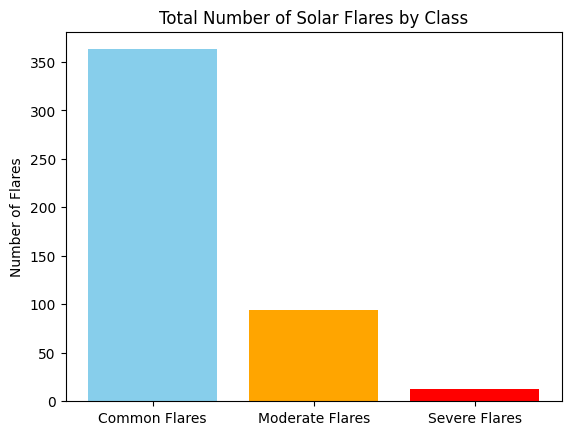

In [ ]:
print(solar_flare_df.columns.tolist())

categories = ['Common Flares', 'Moderate Flares', 'Severe Flares']

# Get flare counts
flare_counts = solar_flare_df[categories].sum()

# Plot using plt.bar with categories as labels
plt.bar(categories, flare_counts.values, color=['skyblue', 'orange', 'red'])
plt.ylabel('Number of Flares')
plt.title('Total Number of Solar Flares by Class')
plt.show()



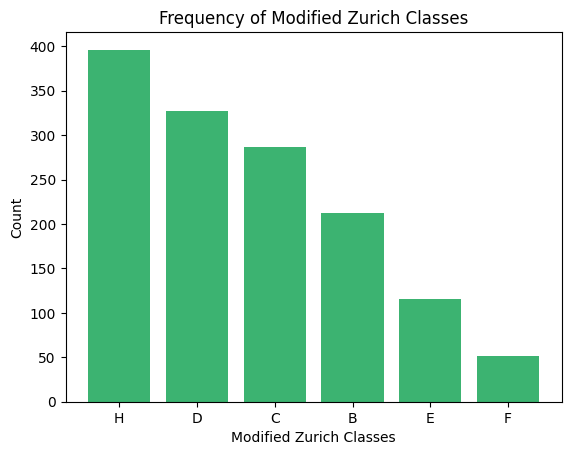

In [ ]:
categories = solar_flare_df['Modified Zurich Class'].unique()

zurich_counts = solar_flare_df['Modified Zurich Class'].value_counts()

plt.bar(categories_sorted, zurich_counts.values, color='mediumseagreen')
plt.ylabel('Count')
plt.xlabel ('Modified Zurich Classes')
plt.title('Frequency of Modified Zurich Classes')
plt.show()
